Singular value decomposition is to find 3 factors U, Σ, and (V^{T})of a real matrix M, where U and (V^{T})are orthogonal matrices, and Σ is a diagonal matrix and the entries on the diagonal are called singular values.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io
plt.rcParams['figure.figsize'] = [15,15]
plt.rcParams.update({'font.size':15})

In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# !pwd

In [3]:
#You will have to change this to your local copy of the dataset
#Dataset from Yale Face Database B
mat_contents = scipy.io.loadmat('/Users/svd/allFaces.mat')
faces = mat_contents['faces']
m = int(mat_contents['m'])
n = int(mat_contents['n'])
nfaces = np.ndarray.flatten(mat_contents['nfaces'])

In [4]:
allPersons  = np.zeros((n*6,m*6))
count = 0
for j in range(6):
  for k in range(6):
     allPersons[j*n:(j+1)*n, k*m:(k+1)*m] = np.reshape(faces[:,sum(nfaces[:count])],(m,n)).T
     count += 1

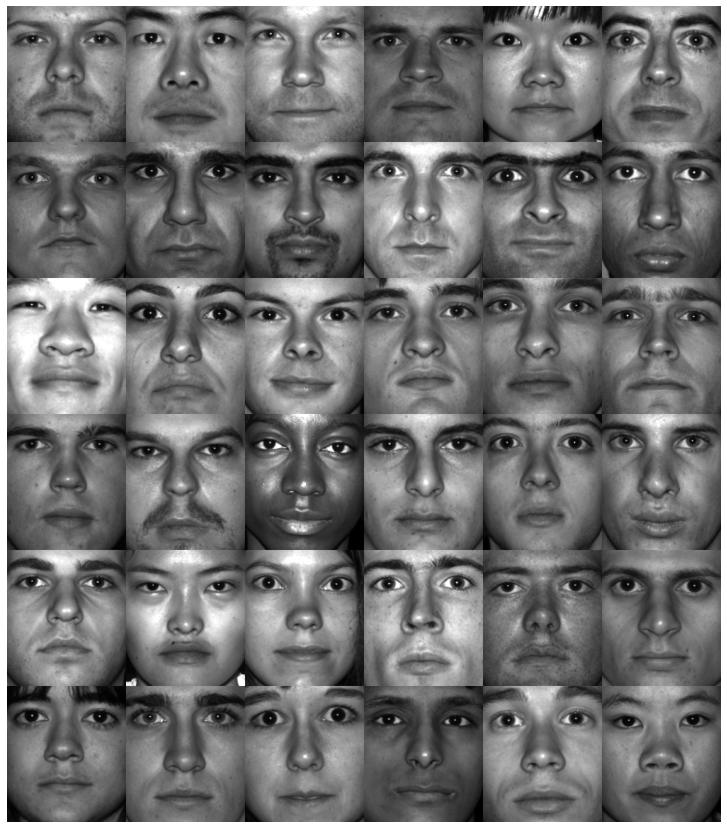

In [5]:
img = plt.imshow(allPersons) #Inverted(Take out 256- to stop inversion)
img.set_cmap('gray')
plt.axis('off')
plt.show()

In [6]:
for person in range(len(nfaces)):
    subset = faces[:,sum(nfaces[:person]):sum(nfaces[:(person+1)])]
    allFaces = np.zeros((n*8,m*8))
    count = 0
    for j in range(8):
        for k in range(8):
            if count < nfaces[person]:
                allFaces[j*n:(j+1)*n,k*m:(k+1)*m] = np.reshape(subset[:,count],(m,n)).T
                count += 1

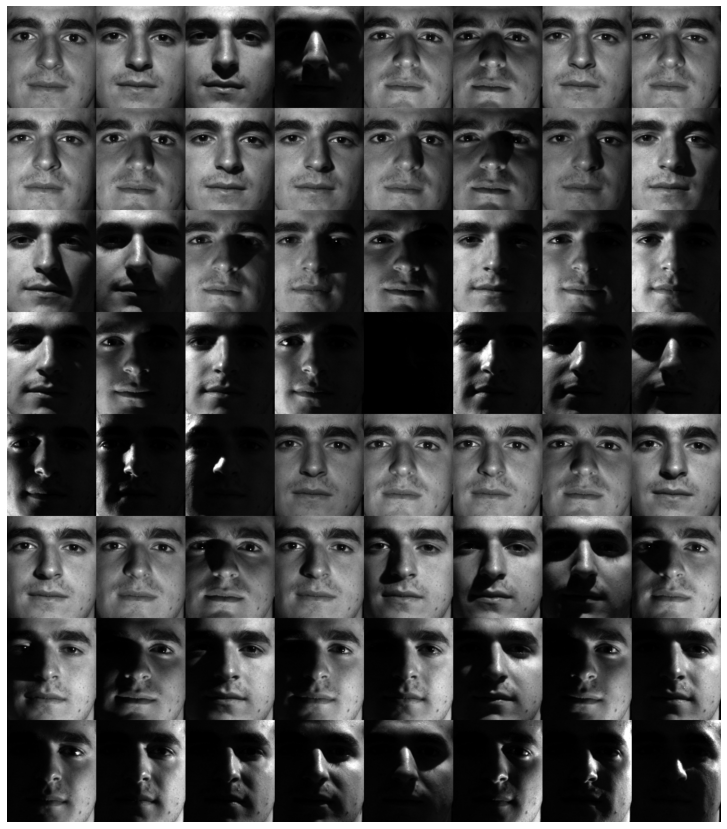

In [7]:
img = plt.imshow(allFaces)
img.set_cmap('gray')
plt.axis('off')
plt.show()

In [8]:
#Training points using the first 36 faces
training_faces = faces[:, :np.sum(nfaces[:36])]
# Plotting the average face 
avg_face = np.mean(training_faces, axis=1) # size n*m by 1
# Computing the SVD   
A = training_faces - np.tile(avg_face,(training_faces.shape[1], 1)).T
U, S, VTranspose = np.linalg.svd(A, full_matrices=0)

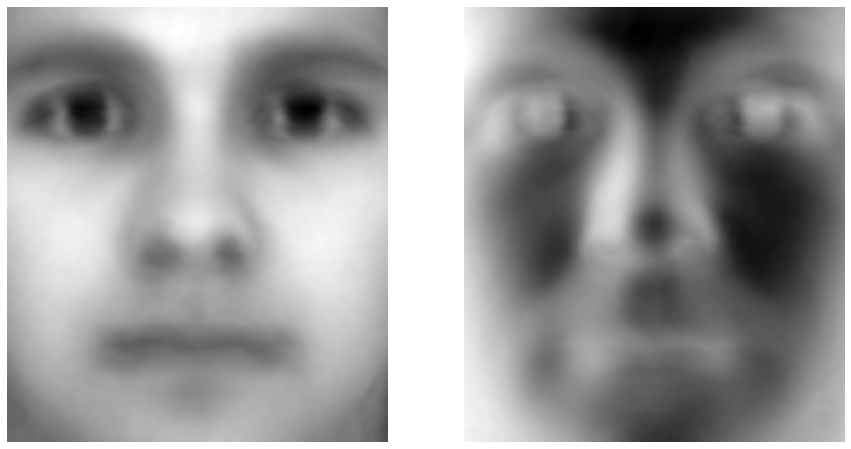

In [9]:
# Plotting different modes
fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
img_avg = ax1.imshow(np.reshape(avg_face,(m,n)).T)
img_avg.set_cmap('gray')
plt.axis('off')

ax2 = fig1.add_subplot(122)
img_u1 = ax2.imshow(np.reshape(U[:,0],(m,n)).T)
img_u1.set_cmap('gray')
plt.axis('off')

plt.show()

32256


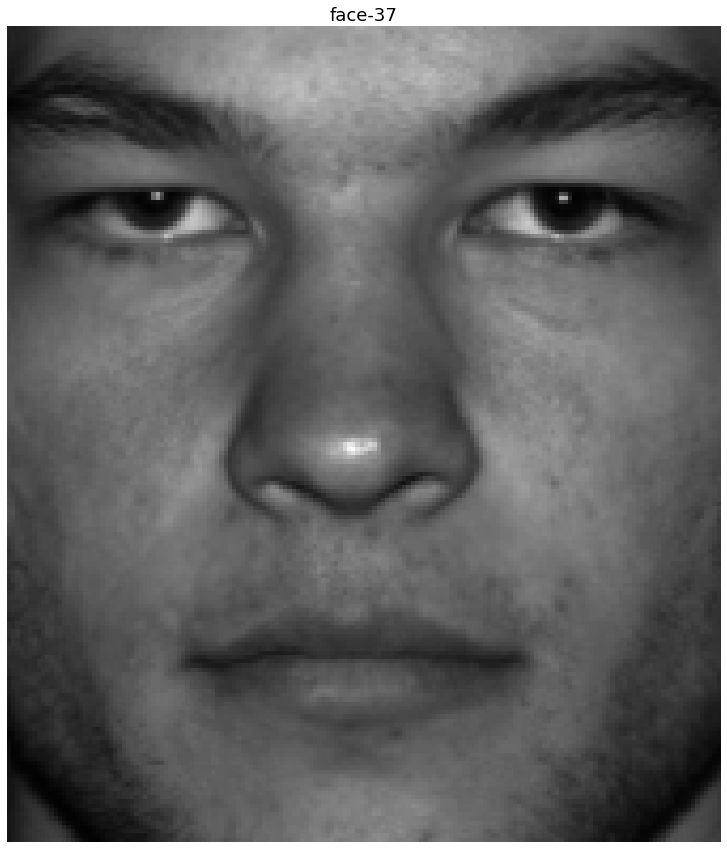

In [10]:
#Test user face 37
test_face = faces[:,np.sum(nfaces[:36])] # First face of person 37
print(test_face.size)
plt.imshow(np.reshape(test_face,(m,n)).T)
plt.set_cmap('gray')
plt.title('face-37')
plt.axis('off')
plt.show()

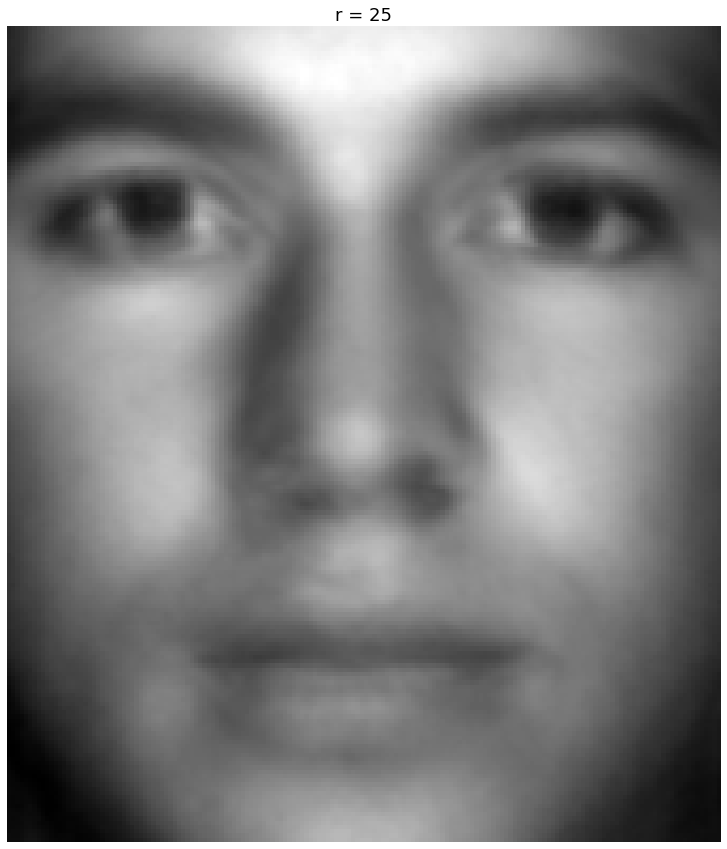

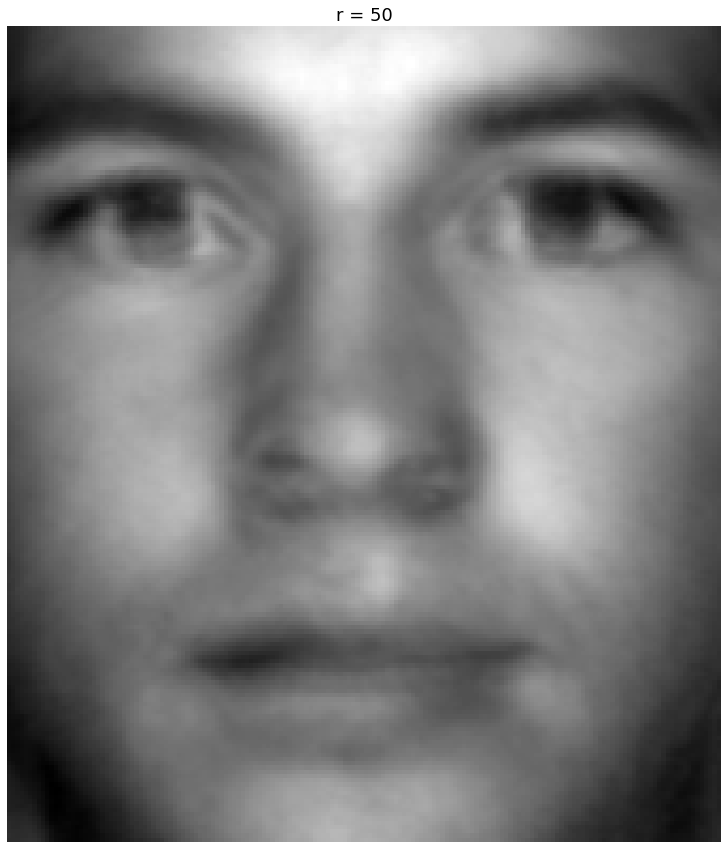

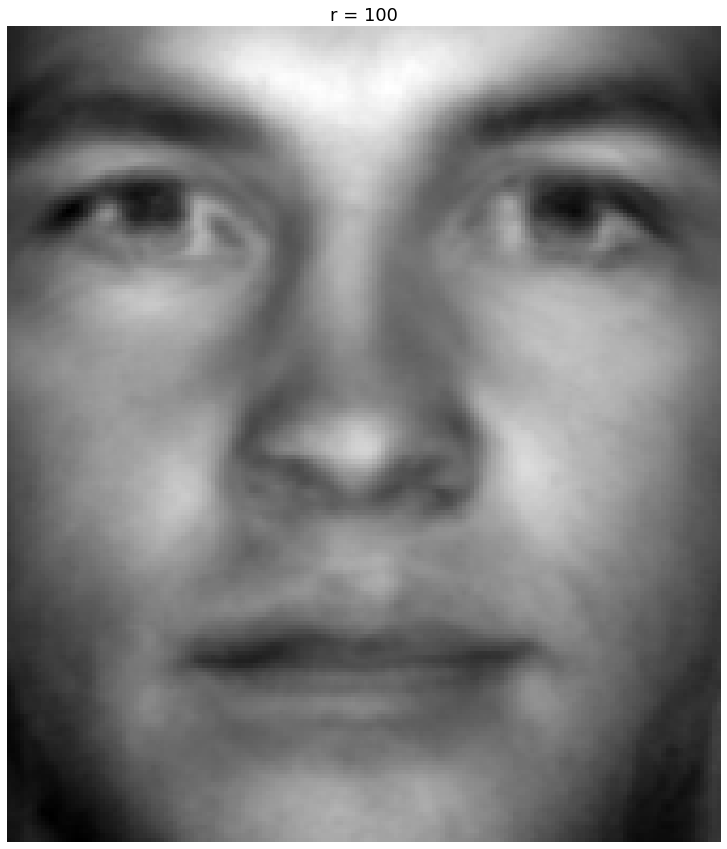

In [11]:
#Different Nodes
test_faceMS = test_face - avg_face
re_list = [25, 50, 100] # you can try 200, 400, 800, 1600 

for mode in re_list:
  reconFace = avg_face + U[:,:mode]  @ U[:,:mode].T @ test_faceMS
  img = plt.imshow(np.reshape(reconFace,(m,n)).T)
  img.set_cmap('gray')
  plt.title('r = ' + str(mode))
  plt.axis('off')
  plt.show()

In [12]:
import matplotlib
matplotlib.__version__

'3.5.0'

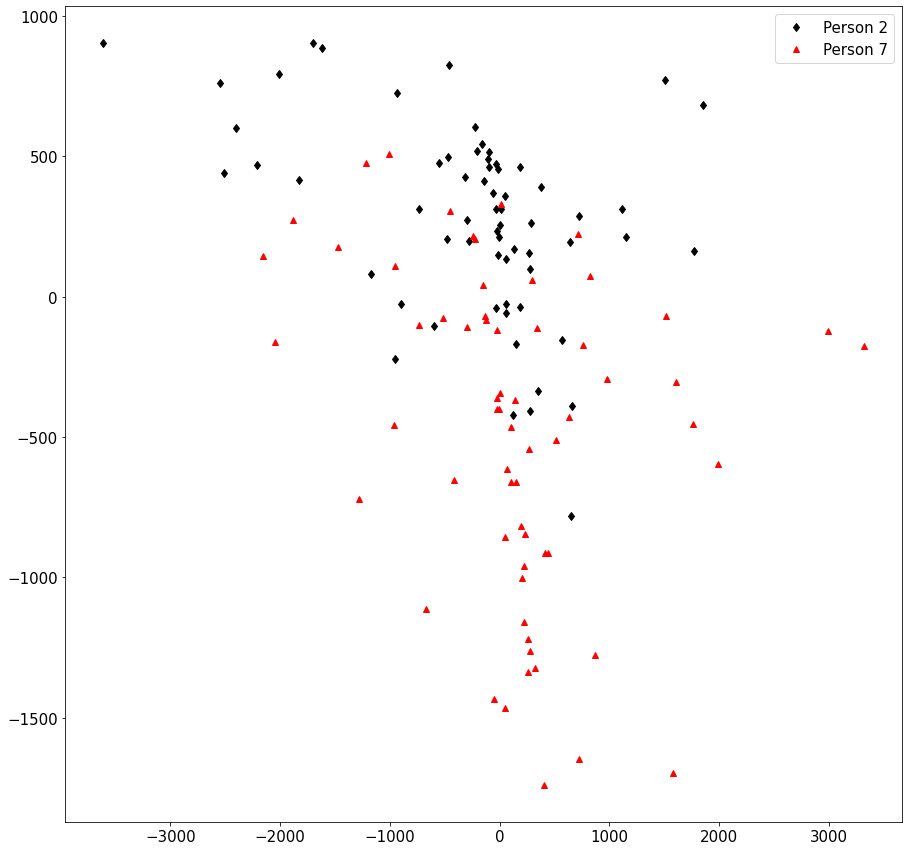

In [13]:
## Project person 2 and 7 onto PC5 and PC6

P1num = 9 # Person number 2
P2num = 7 # Person number 7

P1 = faces[:,np.sum(nfaces[:(P1num-1)]):np.sum(nfaces[:P1num])]
P2 = faces[:,np.sum(nfaces[:(P2num-1)]):np.sum(nfaces[:P2num])]

P1 = P1 - np.tile(avg_face,(P1.shape[1],1)).T
P2 = P2 - np.tile(avg_face,(P2.shape[1],1)).T

PCAmodes = [7, 13] # Project onto PCA modes 5 and 6
PCACoordsP1 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P1
PCACoordsP2 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P2

plt.plot(PCACoordsP1[0,:],PCACoordsP1[1,:],'d',color='k',label='Person 2')
plt.plot(PCACoordsP2[0,:],PCACoordsP2[1,:],'^',color='r',label='Person 7')

plt.legend()
plt.show()

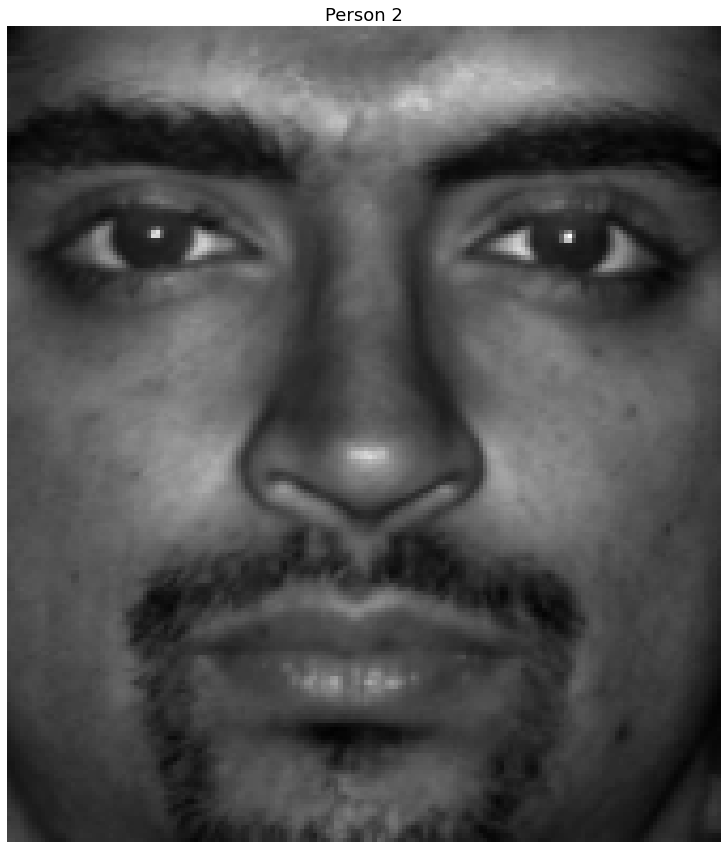

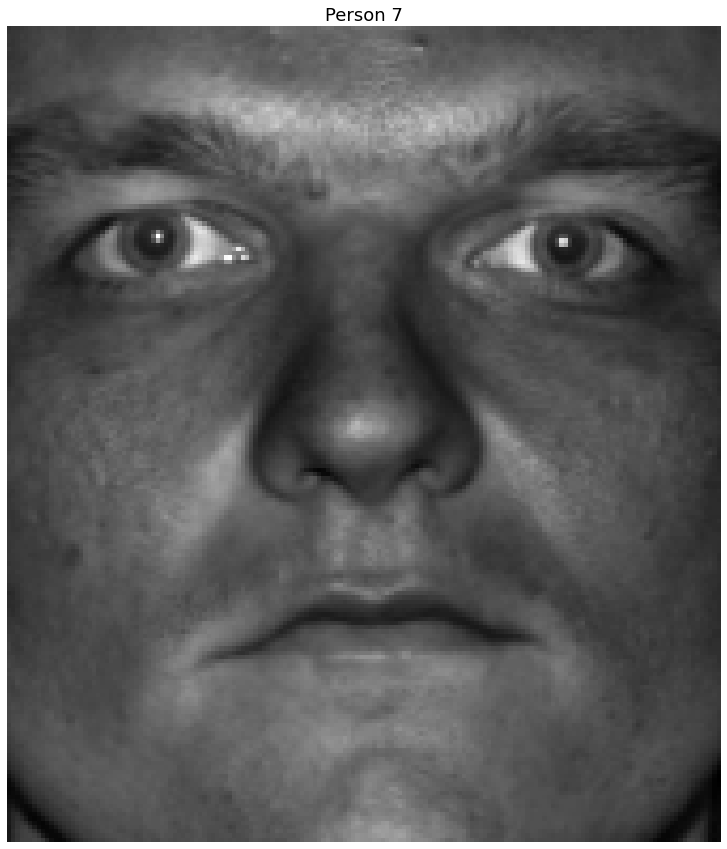

In [14]:
#The image of Person 1
img = plt.imshow(np.reshape(P1[:,0],(m,n)).T)
img.set_cmap('gray')
plt.title('Person 2')
plt.axis('off')
plt.show()

#Image of Person 2
img = plt.imshow(np.reshape(P2[:,0],(m,n)).T)
img.set_cmap('gray')
plt.title('Person 7')
plt.axis('off')
plt.show()

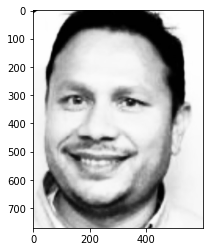

In [15]:
from matplotlib import image
from PIL import Image

%matplotlib inline


url='/Users/nkbista/Desktop/jup_nb/dsba6345/svd/Headshot.jpg'
im = Image.open(url)
plt.imshow(im, cmap='Greys_r')

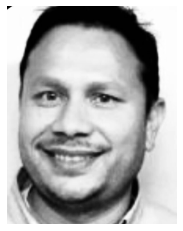

In [16]:
im_arr = np.array(im)
im_arr = im_arr.squeeze()
plt.imshow(im_arr)
plt.axis('off')
plt.show()

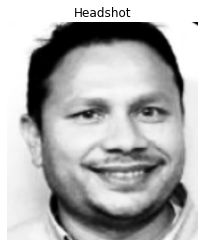

In [17]:
#Test user face 37
#test_face = faces[:,np.sum(nfaces[:36])] # First face of person 37
#!pip3 install opencv-python
#!pip3 install scikit-image
import cv2
from skimage.transform import resize
img = cv2.imread(url, 0)
#May need help of np.rot90 to rotate the picture
img_resized = resize(np.rot90(img), (168,192))
# img_resized = resize(img, (168,192))
img_flatten = img_resized.flatten()
plt.imshow(np.reshape(img_flatten,(m,n)).T)
plt.set_cmap('gray')
plt.title('Headshot')
plt.axis('off')
plt.show()

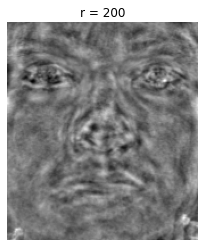

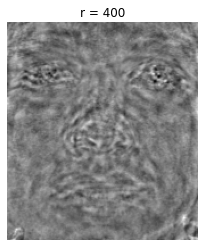

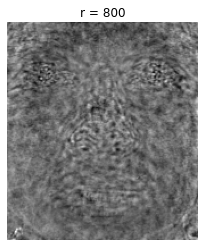

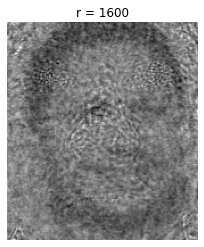

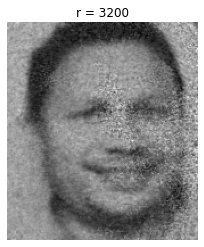

In [18]:
#Different Nodes
test_faceMS = img_flatten - avg_face
# re_list = [25, 50, 100] # you can try 200, 400, 800, 1600 
# re_list = [200, 400, 800, 1600] 
re_list = [200, 400, 800, 1600, 3200]

for mode in re_list:
  reconFace = avg_face + U[:,:mode]  @ U[:,:mode].T @ test_faceMS
  img = plt.imshow(np.reshape(reconFace,(m,n)).T)
  img.set_cmap('gray')
  plt.title('r = ' + str(mode))
  plt.axis('off')
  plt.show()